In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

from typing import List, Tuple
import torch
import hydra
import omegaconf
import numpy as np
from omegaconf import DictConfig
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from pytorch_lightning.loggers import Logger

# pyrootutils.setup_root(__file__, indicator=".project-root", pythonpath=True)

import src.utils.default as utils
import matplotlib.pyplot as plt
torch.set_float32_matmul_precision('medium')

from dotenv import load_dotenv

load_dotenv(Path.cwd().parent/'.env')

from models.UNet3D import UNet3D
from data.dataset import CS_DataModule

In [2]:
# log = utils.get_pylogger(__name__)

EVAL_PATH = '../logs/test_train/runs/2023-02-17_16-10-24/.hydra'
CHKPT_PATH = '/mrhome/vladyslavz/git/central-sulcus-analysis/outputs/test/version_0/checkpoints/epoch=01-validation_dsc=0.8219.ckpt'

device = 'cuda:0'

In [3]:
cfg = omegaconf.OmegaConf.load(EVAL_PATH + '/config.yaml')


2023-02-17 17:09:10,527 - Len of train examples 38, len of val examples 12


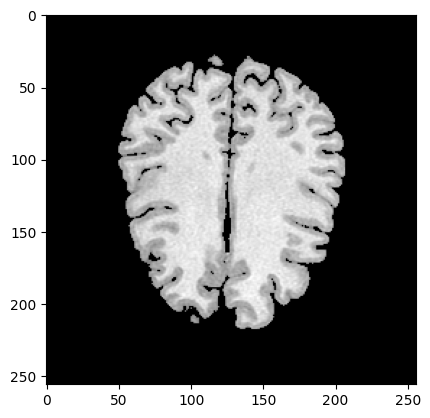

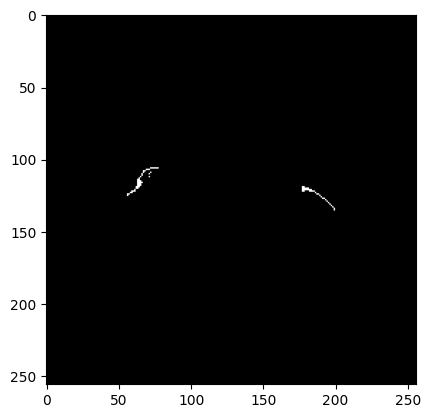

In [4]:
model = UNet3D.load_from_checkpoint(CHKPT_PATH).to(device)
dm = CS_DataModule(cfg.data)

for batch in dm.val_dataloader():
    image = batch['image']
    target = batch['target']
plt.imshow(image[0, 0, 80, :, :], cmap='gray')
plt.show()
plt.imshow(target[0, 0, 80, :, :], cmap='gray')
plt.show()

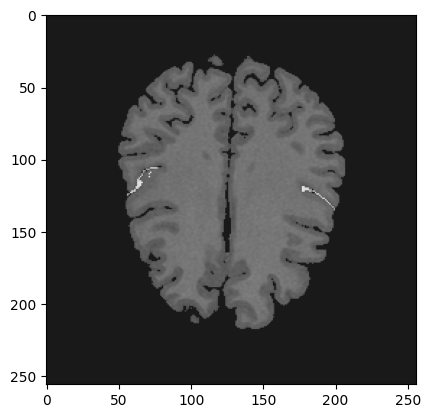

In [5]:
plt.imshow(image[0, 0, 80, :, :], cmap='gray', alpha=0.8)
# plt.show()
plt.imshow(target[0, 0, 80, :, :], cmap='gray', alpha=0.5)
plt.show()

In [6]:
# make prediction
with torch.no_grad():
    pred_proba = model(image.to(device))

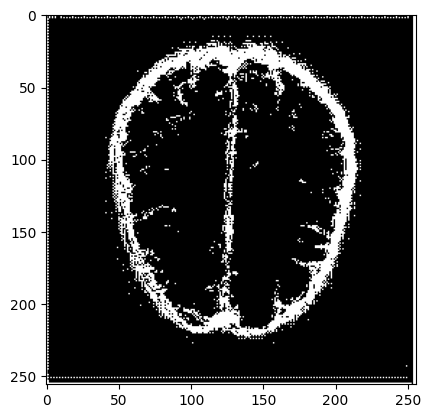

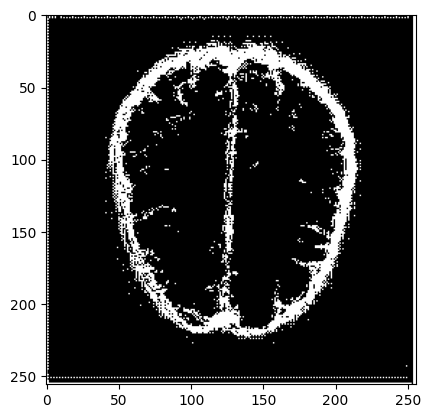

In [7]:
pred = pred_proba.cpu().numpy()
pred = np.argmax((pred[0, :, : :, :]), axis=0)

plt.imshow(pred[80, :, :], cmap='gray')
plt.show()
plt.imshow(pred[80, :, :], cmap='gray')